# I. Count number of word appearing in article

We can count number of times that each word appearing in each type of news/ all news. Then we format them into a csv file

We can conclude that the most frequent word is a/an/the/is... Therefore we have to remove this word to see which meaning 
words appear the most.

In [1]:
def count_word_appearances(sentence, wordDict):
    # Split the sentence into words
    words = sentence.split()


    # Iterate through each word in the list
    for word in words:
        # Remove punctuation and convert to lowercase for case-insensitive counting
        word = word.strip('.,!?"\'').lower()

        wordDict[word] = wordDict.get(word, 0) + 1

    return wordDict



In [2]:
import csv
myDict = {}
with open("Content_the_Guardian_2015_2023/the_guardian_full.csv", 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        content = row["Content"]
        if content == "None":
            continue
        myDict = count_word_appearances(content, myDict)
myDict

{'police': 54708,
 'in': 2697815,
 'canada': 5908,
 'say': 68484,
 'seven': 22057,
 'people': 247343,
 'have': 644094,
 'been': 355774,
 'shot': 19062,
 'at': 717057,
 'a': 3437308,
 'new': 229639,
 'year’s': 15433,
 'eve': 3728,
 'house': 53746,
 'party': 25815,
 'calgary': 152,
 'and': 3536378,
 'that': 1401943,
 'one': 315202,
 'of': 3609862,
 'the': 7404746,
 'victims': 10278,
 'has': 568501,
 'died': 31093,
 'hospital': 15124,
 'said': 383004,
 'identity': 7890,
 'dead': 16213,
 'person': 27259,
 'would': 265221,
 'not': 484899,
 'be': 664323,
 'released': 23353,
 'until': 53135,
 'an': 529570,
 'autopsy': 268,
 'had': 386780,
 'performed': 5593,
 'on': 1125851,
 'friday.according': 3,
 'to': 3693125,
 'detective': 2936,
 'steve': 7573,
 'adair': 65,
 'received': 19297,
 'multiple': 8820,
 'calls': 16287,
 'just': 195062,
 'after': 232713,
 '5am': 485,
 '1': 18783,
 'january': 18427,
 'reporting': 5706,
 'shots': 4430,
 'fired': 4431,
 'he': 658617,
 'says': 169504,
 'by': 693280,

In [3]:
sortedDict = sorted(myDict.items(), key = lambda x:x[1], reverse = True)

In [4]:
topWord = [i[0] for i in sortedDict[:50]]
topWord

['the',
 'to',
 'of',
 'and',
 'a',
 'in',
 'is',
 'that',
 'for',
 'on',
 'it',
 'with',
 'was',
 'as',
 'at',
 'by',
 'from',
 'be',
 'he',
 'are',
 'i',
 'have',
 '–',
 'but',
 'has',
 'his',
 'an',
 'this',
 'not',
 'they',
 'you',
 'we',
 'their',
 'who',
 'had',
 'said',
 'or',
 'her',
 'will',
 'been',
 'more',
 'about',
 'which',
 'she',
 'were',
 'one',
 'up',
 'when',
 'all',
 'its']

## Count appearance of related topic

In [5]:
import csv
import ast

def countTags(tagList, tagDict):
    # Iterate through each tag in the list
    for tag in tagList:
        # Increment the tag count in the dictionary
        tagDict[tag] = tagDict.get(tag, 0) + 1

    return tagDict

In [6]:
tagDict = {}
with open("Content_the_Guardian_2015_2023/the_guardian_full.csv", 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        # Convert the string representation of the list to an actual list
        try:
            tags = ast.literal_eval(row["Tags"])
        except (ValueError, SyntaxError):
            # Skip rows where the tags column is not a properly formatted list
            continue

        tagDict = countTags(tags, tagDict)

In [7]:
tagDict

{'Canada': 956,
 'Americas': 3055,
 'Gun crime': 134,
 'news': 75832,
 'Bahrain': 36,
 'Middle East and north Africa': 2873,
 'US foreign policy': 436,
 'Greece': 497,
 'Water transport': 81,
 'Europe': 7134,
 'Italy': 967,
 'Albania': 41,
 'China': 1674,
 'New year': 60,
 'Asia Pacific': 2708,
 'Iran': 501,
 'Germany': 935,
 'France': 1960,
 'Nuclear weapons': 248,
 'India': 959,
 'Japan': 444,
 'Rape and sexual assault': 473,
 'Migration': 934,
 'Mexico': 571,
 'Virginia': 47,
 'Ebola': 161,
 'Glasgow': 155,
 'Scotland': 1686,
 'Sierra Leone': 107,
 'Africa': 3722,
 'Health': 4382,
 'New Zealand': 576,
 'Mountaineering': 91,
 'Animals': 2831,
 'Animal welfare': 359,
 'Wildlife': 3599,
 'Illegal wildlife trade': 92,
 'Conservation': 1988,
 'features': 50829,
 'Islamic State': 574,
 'Iraq': 318,
 'Mosul': 49,
 'Mobile phones': 884,
 'Syria': 780,
 'Julie Bishop': 28,
 'Australian security and counter-terrorism': 36,
 'Nepal': 140,
 'Mount Everest': 21,
 'Indigenous peoples': 337,
 'Mou

In [32]:
sortedDict = sorted(tagDict.items(), key = lambda x:x[1], reverse = True)
sortedDict

[('news', 75832),
 ('features', 50829),
 ('reviews', 15316),
 ('The Observer', 13525),
 ('Television', 11087),
 ('Europe', 7134),
 ('comment', 6029),
 ('Art', 5621),
 ('Coronavirus', 5544),
 ('Pop and rock', 5435),
 ('Fiction', 4849),
 ('Consumer affairs', 4799),
 ('Life and style', 4690),
 ('blogposts', 4663),
 ('letters', 4458),
 ('Climate crisis', 4409),
 ('Health', 4382),
 ('Film', 4141),
 ('London', 4031),
 ('obituaries', 3891),
 ('Books', 3736),
 ('Africa', 3722),
 ('Wildlife', 3599),
 ('UK news', 3532),
 ('Women', 3363),
 ('Games', 3312),
 ('Global development', 3311),
 ('Fashion', 3299),
 ('interviews', 3252),
 ('Retail industry', 3113),
 ('Americas', 3055),
 ('Middle East and north Africa', 2873),
 ('Animals', 2831),
 ('Economics', 2780),
 ('Asia Pacific', 2708),
 ('Internet', 2666),
 ('Rugby union', 2589),
 ('US sports', 2505),
 ('match reports', 2495),
 ('Photography', 2486),
 ('Classical music', 2482),
 ('Food', 2459),
 ('Australia sport', 2381),
 ('Sudoku', 2309),
 ('Prope

In [9]:
for i in sortedDict:
    if (i[0] == "Coronavirus"):
        print(i)

('Coronavirus', 5544)


# III. Visualize tags for the whole data

## 1. Create a bar histogram:

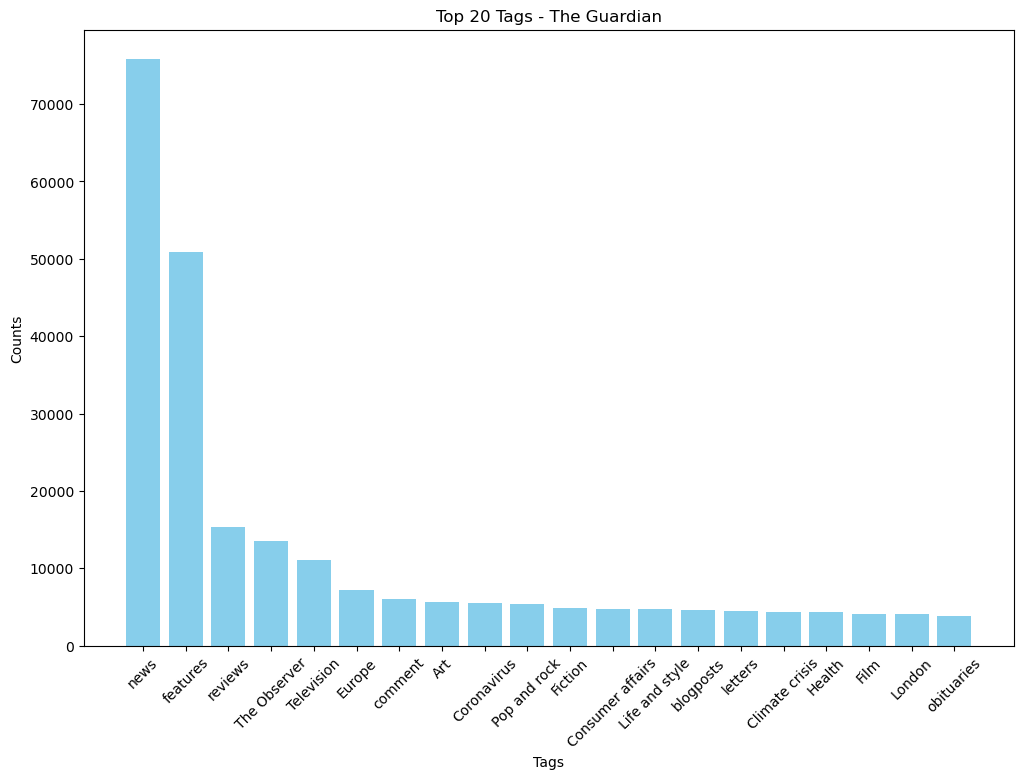

In [40]:
import matplotlib.pyplot as plt

# Unpacking the topics and their counts
topics, counts = zip(*sortedDict[:20])  # Directly take the top 20 topics

# Creating the vertical bar chart
plt.figure(figsize=(12, 8))  # Set the size of the plot
plt.bar(topics, counts, color='skyblue')  # Create vertical bar plot
plt.ylabel('Counts')
plt.xlabel('Tags')
plt.title('Top 20 Tags - The Guardian')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

## 2. Create a Word Cloud

### Install wordcloud

In [15]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 153.3/153.3 kB 1.8 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


### Now create a simple wordcloud:

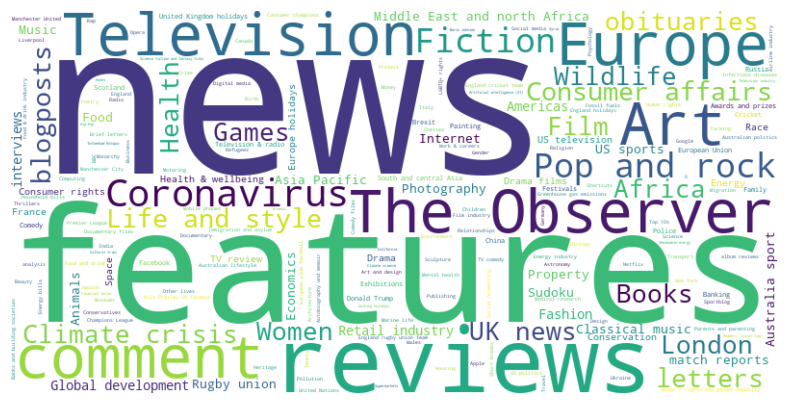

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Normalize the frequencies to ensure each word appears only once
normalized_data = {key: 1 for key, value in sortedDict}

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(normalized_data)

# Plotting the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# III. Visualize tags for each topic

**You can choose one topic to visualize from this list:**

*['world', 'uk-news', 'environment', 'science', 'global-development', 'football', 'technology', 'business', 'obituaries', 'sport', 'books', 'music', 'tv-and-radio', 'artanddesign', 'film', 'games', 'lifeandstyle','fashion', 'travel', 'money']*

In [45]:
import csv
import ast

def countTags(tagList, tagDict):
    # Iterate through each tag in the list
    for tag in tagList:
        # Increment the tag count in the dictionary
        tagDict[tag] = tagDict.get(tag, 0) + 1

    return tagDict

tagDict = {}
with open("Content_the_Guardian_2015_2023/the_guardian_full.csv", 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        # Check if '/world/' is in the URL
        if '/football/' in row["URL"]:
            # Convert the string representation of the list to an actual list
            try:
                tags = ast.literal_eval(row["Tags"])
            except (ValueError, SyntaxError):
                # Skip rows where the tags column is not a properly formatted list
                continue

            tagDict = countTags(tags, tagDict)
sortedDictfromTopic = sorted(tagDict.items(), key = lambda x:x[1], reverse = True)
sortedDictfromTopic

[('news', 6471),
 ('features', 2129),
 ('match reports', 1386),
 ('Liverpool', 1212),
 ('Premier League', 1208),
 ('European club football', 1160),
 ('Manchester United', 1142),
 ('Manchester City', 1015),
 ('Chelsea', 1010),
 ('The Observer', 995),
 ('Champions League', 863),
 ('Arsenal', 811),
 ('England', 802),
 ('Tottenham Hotspur', 797),
 ('Sportblog', 790),
 ('Transfer window', 604),
 ("Women's football", 533),
 ('Jürgen Klopp', 501),
 ('Everton', 483),
 ('Championship', 405),
 ('Real Madrid', 382),
 ('Pep Guardiola', 378),
 ('FA Cup', 371),
 ('comment', 365),
 ('La Liga', 362),
 ('José Mourinho', 355),
 ('Football', 349),
 ('Barcelona', 346),
 ('Australia sport', 326),
 ('Newcastle United', 316),
 ('West Ham United', 313),
 ('Leicester City', 302),
 ('World Cup', 299),
 ('Europa League', 293),
 ('Gareth Southgate', 292),
 ('Serie A', 280),
 ('World Cup 2018', 234),
 ('Juventus', 231),
 ('Football politics', 223),
 ('Paris Saint-Germain', 216),
 ('Crystal Palace', 212),
 ('Bayern

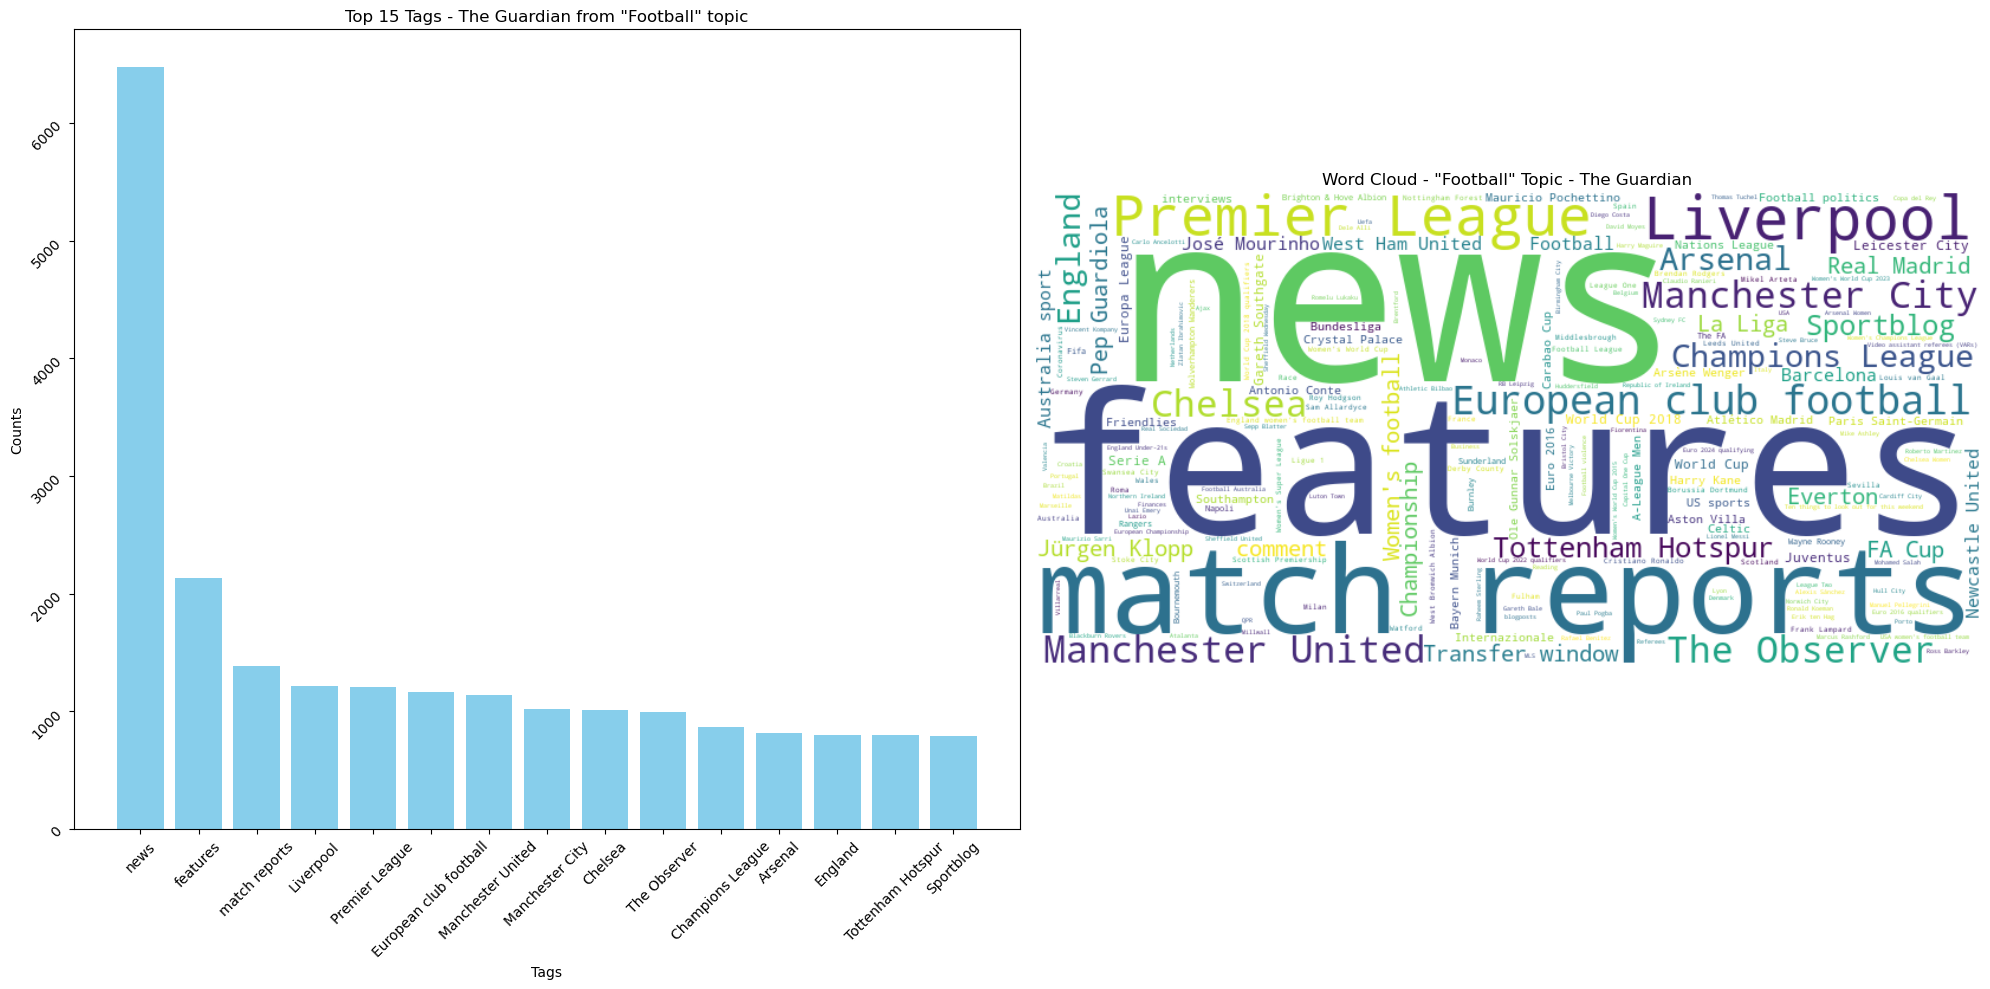

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Setup for subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns

# Bar chart
topics, counts = zip(*sortedDictfromTopic[:15])  # Directly take the top 20 topics
axs[0].bar(topics, counts, color='skyblue')  # Create vertical bar plot
axs[0].set_ylabel('Counts')
axs[0].set_xlabel('Tags')
axs[0].set_title('Top 15 Tags - The Guardian from "Football" topic')
axs[0].tick_params(labelrotation=45)  # Rotate the x-axis labels for better readability

# Word cloud
normalized_data = {key: 1 for key, value in sortedDictfromTopic}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(normalized_data)
axs[1].imshow(wordcloud, interpolation='bilinear')
axs[1].set_title('Word Cloud - "Football" Topic - The Guardian')
axs[1].axis('off')  # Hide the axis for the word cloud

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# IV. Visualize the relationship between tags

## 1. A naive approach

**Firstly, I will run things with guardian_links_test.csv**

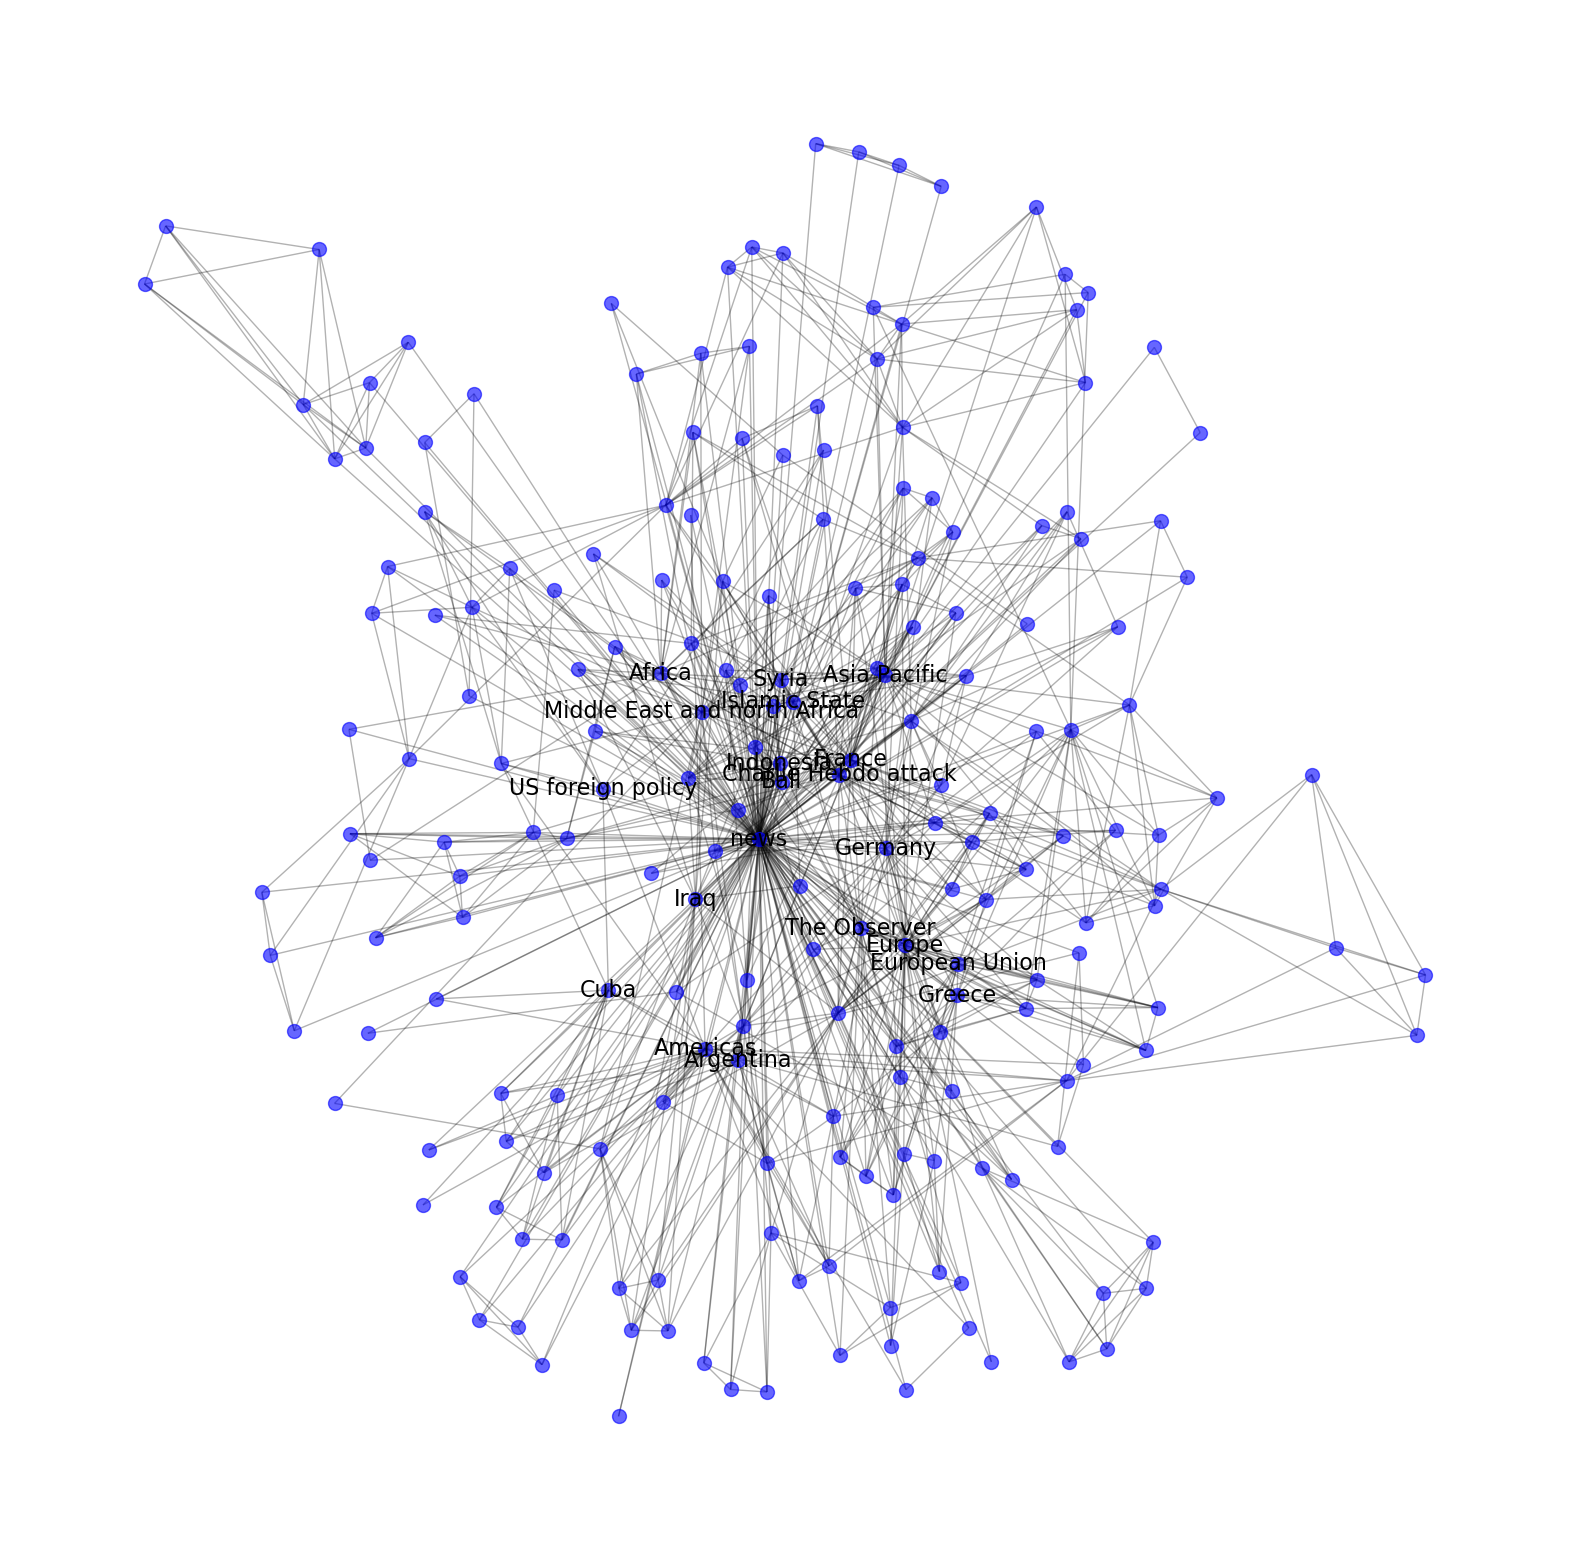

In [54]:
import csv
import ast
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Function to count co-occurrences of tags
def count_cooccurrences(tags, cooccur_dict, tag_counter):
    # This function updates the co-occurrence dictionary with all pairs of tags
    for tag1, tag2 in combinations(tags, 2):
        if tag1 != tag2:
            sorted_pair = tuple(sorted([tag1, tag2]))
            cooccur_dict[sorted_pair] = cooccur_dict.get(sorted_pair, 0) + 1
    # Also update the tag count
    for tag in tags:
        tag_counter[tag] += 1
    return cooccur_dict

# Initialize an empty dictionary to store co-occurrences and a counter for individual tags
cooccurrences = {}
tag_counter = Counter()

# Read the CSV file and update co-occurrences
with open("guardian_links_test.csv", 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        try:
            tags = ast.literal_eval(row["Tags"])
            cooccurrences = count_cooccurrences(tags, cooccurrences, tag_counter)
        except (ValueError, SyntaxError):
            continue

# Determine the top 20 most frequent tags
top_tags = [tag for tag, count in tag_counter.most_common(20)]

# Now, create the network graph from the co-occurrence dictionary
G = nx.Graph()

# Add edges to the graph (each with a weight)
for (tag1, tag2), weight in cooccurrences.items():
    G.add_edge(tag1, tag2, weight=weight)

# Draw the network graph
plt.figure(figsize=(20, 20))  # Increase figure size
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Positions for all nodes
nx.draw_networkx_edges(G, pos, alpha=0.3)
# Draw labels for the top 20 most frequent tags
labels = {tag: tag for tag in G.nodes() if tag in top_tags}
nx.draw_networkx_labels(G, pos, labels, font_size=16, font_color='black')

# Draw nodes last so they are on top of the edges
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='blue', alpha=0.6)

# Show the plot
plt.axis('off')  # Hide the axes
plt.show()


**Now let's just consider with 50 tags only**

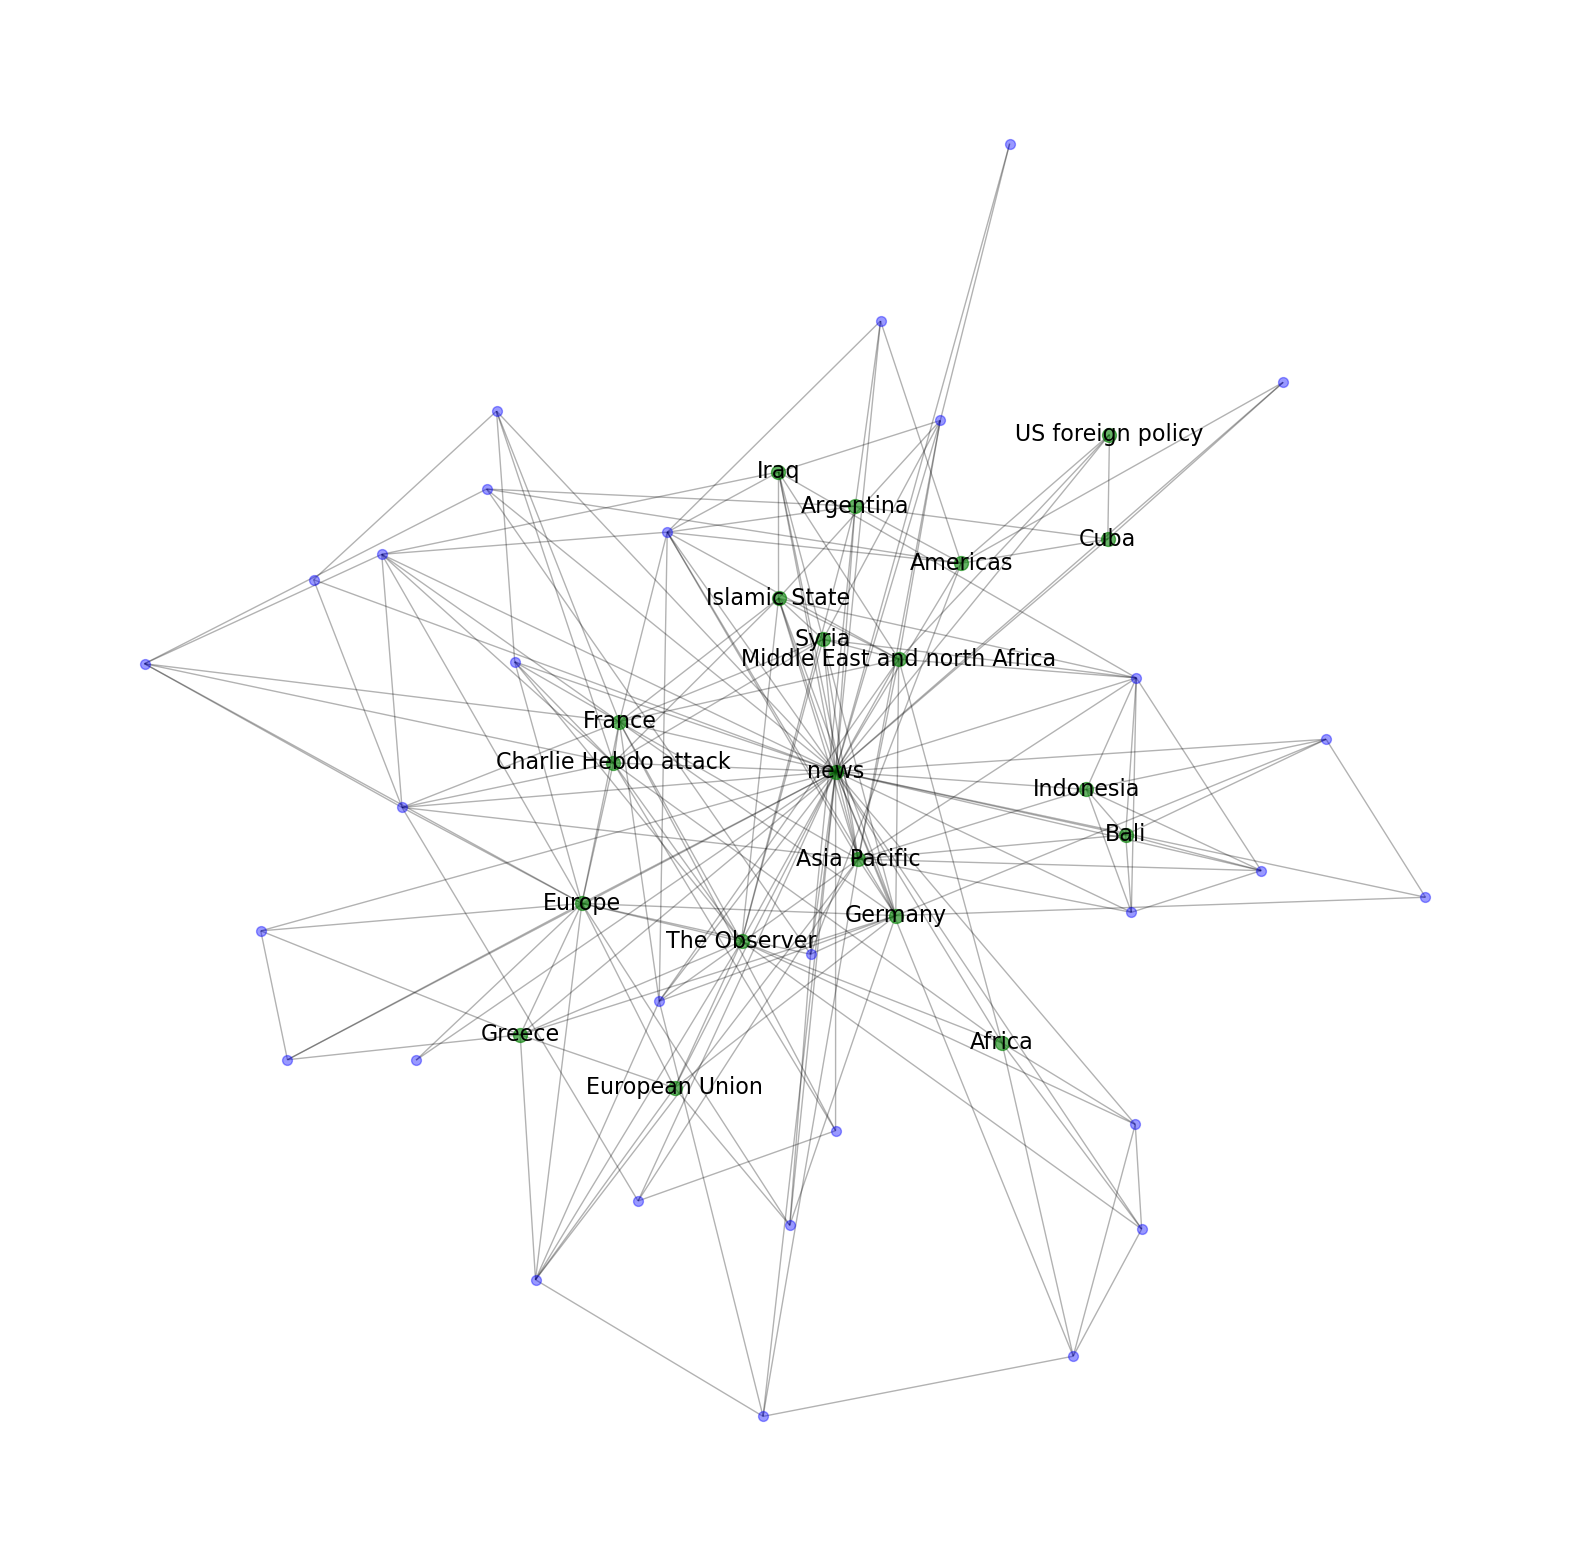

In [56]:
import csv
import ast
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Function to count co-occurrences of tags
def count_cooccurrences(tags, cooccur_dict, tag_counter):
    for tag in tags:
        tag_counter[tag] += 1
    # Update the co-occurrence dictionary with all pairs of tags
    for tag1, tag2 in combinations(tags, 2):
        if tag1 != tag2:
            sorted_pair = tuple(sorted([tag1, tag2]))
            cooccur_dict[sorted_pair] = cooccur_dict.get(sorted_pair, 0) + 1
    return cooccur_dict

# Initialize an empty dictionary to store co-occurrences and a counter for individual tags
cooccurrences = {}
tag_counter = Counter()

# Read the CSV file and update co-occurrences
with open("guardian_links_test.csv", 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        try:
            tags = ast.literal_eval(row["Tags"])
            cooccurrences = count_cooccurrences(tags, cooccurrences, tag_counter)
        except (ValueError, SyntaxError):
            continue

# Determine the top 50 most frequent tags
top_50_tags = set(tag for tag, count in tag_counter.most_common(50))

# Filter cooccurrences to only include top 50 tags
filtered_cooccurrences = {pair: freq for pair, freq in cooccurrences.items() if pair[0] in top_50_tags and pair[1] in top_50_tags}

# Now, create the network graph from the filtered co-occurrence dictionary
G = nx.Graph()

# Add edges to the graph (each with a weight) only for top 50 tags
for (tag1, tag2), weight in filtered_cooccurrences.items():
    if tag1 in top_50_tags and tag2 in top_50_tags:
        G.add_edge(tag1, tag2, weight=weight)

# Top 20 tags for labeling
top_20_tags = {tag for tag, count in tag_counter.most_common(20)}

# Draw the network graph
plt.figure(figsize=(20, 20))  # Increase figure size
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Positions for all nodes
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Draw labels for the top 20 most frequent tags
labels = {tag: tag for tag in top_20_tags if tag in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=16, font_color='black')

# Draw nodes last so they are on top of the edges
nx.draw_networkx_nodes(G, pos, nodelist=top_20_tags, node_size=100, node_color='green', alpha=0.6)
nx.draw_networkx_nodes(G, pos, nodelist=set(G.nodes()) - top_20_tags, node_size=50, node_color='blue', alpha=0.4)

# Show the plot
plt.axis('off')  # Hide the axes
plt.show()


## 2. Visualization with BERTopic

Source: https://maartengr.github.io/BERTopic/getting_started/visualization/visualization.html#visualize-topics

In [49]:
!pip install bertopic

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 154.1/154.1 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 5.2/5.2 MB 15.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 86.0/86.0 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 90.9/90.9 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.9/7.9 MB 24.1 MB/s eta 0:00:00
    

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


### Create a content_list with 18411 news articles of "The Guardian" from 1/1/2023 to 23/11/2023

In [60]:
import csv

# Path to the CSV file
file_path = '2023news.csv'

# Initialize a list to store the content
content_list = []

# Read the CSV file and extract the content
with open(file_path, 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        content_list.append(row["Content"])

content_list[:50]  # show only the first 50 entries for brevity

['There’s nothing quite like the Erez crossing, the only civilian route between Israel and the blockaded Gaza Strip, anywhere else in the world. The Israeli side looks like an airport terminal, but is in fact a fortress: surveillance balloons and motion sensors monitor above and below the sea and land that make up Gaza’s de facto borders, while semi-autonomous robots, equipped with machine guns, patrol the buffer zone.Inside, Israeli border and military personnel use offices connected by walkways high above the ground to minimise the risk of attack. Single-person turnstiles, mazes of movable walls and caged walkways eventually lead to Palestinian territory.Built in the 2000s at a cost of $60m (£50m), Erez was designed to facilitate about 45,000 Palestinians a day who used to leave the strip to go to work in Israel. The militant group Hamas took over just four months after it was finished, however, leading the Israelis – who occupied Gaza from 1967 to 2005 before withdrawing their force

### Train with 2023 articles

In [61]:
#train with 2023 data
from bertopic import BERTopic

my_topic_model = BERTopic()
topics, probs = my_topic_model.fit_transform(content_list) 

**Now we can call .visualize_topics to create a 2D representation of your topics.**

**The resulting graph is a plotly interactive graph which can be converted to HTML:**

In [62]:
my_topic_model.visualize_topics()